<a href="https://colab.research.google.com/github/woodsj1206/Train-Yolov8-Instance-Segmentation-On-Custom-Dataset/blob/main/Train_Yolov8_Instance_Segmentation_On_Custom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pretrained Model: https://github.com/woodsj1206/Train-Yolov8-Instance-Segmentation-On-Custom-Dataset/blob/main/Train_Yolov8_Instance_Segmentation_On_Custom_Dataset.ipynb

#Step 1: Checking GPU Availability
Check if a GPU is available in your Google Colab environment. A GPU can significantly accelerate the training process of deep learning models like YOLOv8.

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


#Step 2: Unzipping Dataset Files
Unzip the dataset files containing images and annotations. These files are typically compressed to save space and are now being extracted for use in training the YOLOv8 model.

**NOTE:** Ensure that the images and their corresponding annotation files have the same names (e.g., image_1.png should have an associated image_1.txt file).

In [2]:
'''
# Unzip the zip file containing the images
!unzip -q 'REPLACE_WITH_YOUR_IMAGE_ZIP_FILE_PATH' -d '/content/images'

# Unzip the zip file containing the annotations
!unzip -q 'REPLACE_WITH_YOUR_ANNOTATIONS_ZIP_FILE_PATH' -d '/content/annotations'
'''

"\n# Unzip the zip file containing the images\n!unzip -q 'REPLACE_WITH_YOUR_IMAGE_ZIP_FILE_PATH' -d '/content/images'\n\n# Unzip the zip file containing the annotations\n!unzip -q 'REPLACE_WITH_YOUR_ANNOTATIONS_ZIP_FILE_PATH' -d '/content/annotations'\n"

#Step 3: Installing Ultralytics
Install Ultralytics, a library that simplifies working with YOLO object detection models.

In [3]:
# Install Ultralytics library
!pip install ultralytics

# Import necessary modules from Ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 19.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


#Step 4: Mounting Google Drive
Mount Google Drive to the Colab environment, enabling access to files stored in your Google Drive.

In [4]:
# Import the drive module from google.colab
from google.colab import drive

# Mount Google Drive to '/content/Google_Drive'
drive.mount('/content/drive')

Mounted at /content/drive


#Step 5: Define Root Directory and Create Subdirectories
Define the root directory for your project and create necessary subdirectories to organize your data.

In [5]:
import os

# Define the path where your original images and masks are
PATH = "/content/drive/MyDrive/BreastCancerProject/Datasets/label_mask_images/drive-download-20250426T162002Z-001"

# Define where you want to save the processed dataset
ROOT_DIR = "/content/drive/MyDrive/BreastCancerProject/Datasets/ProcessedDataset"

# Create directories for dataset structure
DATA_DIR = os.path.join(ROOT_DIR, 'data')

IMAGES_DIR = os.path.join(DATA_DIR, 'images')
IMAGES_TRAIN_DIR = os.path.join(IMAGES_DIR, 'train')
IMAGES_VAL_DIR = os.path.join(IMAGES_DIR, 'val')

LABELS_DIR = os.path.join(DATA_DIR, 'labels')
LABELS_TRAIN_DIR = os.path.join(LABELS_DIR, 'train')
LABELS_VAL_DIR = os.path.join(LABELS_DIR, 'val')

TESTING_DIR = os.path.join(ROOT_DIR, 'testing')

# Create folders if ROOT_DIR doesn't exist
if not os.path.exists(ROOT_DIR):
    os.makedirs(IMAGES_TRAIN_DIR)
    os.makedirs(IMAGES_VAL_DIR)
    os.makedirs(LABELS_TRAIN_DIR)
    os.makedirs(LABELS_VAL_DIR)
    os.makedirs(TESTING_DIR)
    print(f"✅ Root directory '{ROOT_DIR}' created successfully.")
else:
    print(f"ℹ️ Root directory '{ROOT_DIR}' already exists.")


ℹ️ Root directory '/content/drive/MyDrive/BreastCancerProject/Datasets/ProcessedDataset' already exists.


#Step 6: Organize Dataset for Training and Validation
Organize the dataset by moving images and corresponding annotations into separate directories for training and validation.

In [6]:
import os

folder_path = '/content/drive/MyDrive/BreastCancerProject/Datasets/label_mask_images/drive-download-20250426T162002Z-001/benign'

print(os.listdir(folder_path))


['benign (3).png', 'benign2 (251).png', 'benign2 (237)_mask.png', 'benign (280)_mask.png', 'benign (318).png', 'benign2 (269).png', 'benign2 (250)_mask.png', 'benign (284)_mask.png', 'benign2 (24)_mask.png', 'benign2 (242)_mask.png', 'benign (315).png', 'benign (309).png', 'benign2 (236).png', 'benign2 (247).png', 'benign (311)_mask.png', 'benign2 (251)_mask.png', 'benign2 (266).png', 'benign2 (242).png', 'benign2 (27)_mask.png', 'benign (320).png', 'benign2 (249)_mask.png', 'benign (15).png', 'benign (138)_mask.png', 'benign2 (243).png', 'benign2 (267).png', 'benign (313)_mask.png', 'benign2 (243)_mask.png', 'benign2 (252).png', 'benign2 (245)_mask.png', 'benign2 (236)_mask.png', 'benign2 (261)_mask.png', 'benign2 (240)_mask.png', 'benign2 (248).png', 'benign2 (239).png', 'benign2 (250).png', 'benign (317).png', 'benign2 (269)_mask.png', 'benign2 (235)_mask.png', 'benign (158)_mask.png', 'benign (146)_mask.png', 'benign (159).png', 'benign (167)_mask.png', 'benign (191).png', 'benign 

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os

folder_path = '/content/drive/MyDrive/BreastCancerProject/Datasets/label_mask_images/drive-download-20250426T162002Z-001/benign'

all_files = os.listdir(folder_path)

# Normalize filenames (just in case)
all_files = [f.strip() for f in all_files]

# Separate images and masks
image_files = [f for f in all_files if '_mask' not in f and (f.endswith('.png') or f.endswith('.jpg'))]
mask_files = [f for f in all_files if '_mask' in f and (f.endswith('.png') or f.endswith('.jpg'))]

print(f"Images (no '_mask'): {len(image_files)}")
print(f"Masks (with '_mask'): {len(mask_files)}")


Images (no '_mask'): 874
Masks (with '_mask'): 908


In [9]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Corrected Paths (matching your setup)
DATASET_ROOT = '/content/drive/MyDrive/BreastCancerProject/Datasets/label_mask_images/drive-download-20250426T162002Z-001'

# See a few sample filenames
for class_folder in os.listdir(DATASET_ROOT):
    print(f"📂 {class_folder}")
    sample_files = os.listdir(os.path.join(DATASET_ROOT, class_folder))[:10]
    for f in sample_files:
        print(f"   {f}")
    print("\n")

IMAGES_TRAIN_DIR = '/content/Google_Drive/MyDrive/content/drive/MyDrive/BreastCancerProject/Datasets/data/images/train'
IMAGES_VAL_DIR = '/content/Google_Drive/MyDrive/content/drive/MyDrive/BreastCancerProject/Datasets/data/images/val'
LABELS_TRAIN_DIR = '/content/Google_Drive/MyDrive/content/drive/MyDrive/BreastCancerProject/Datasets/data/labels/train'
LABELS_VAL_DIR = '/content/Google_Drive/MyDrive/content/drive/MyDrive/BreastCancerProject/Datasets/data/labels/val'

# Create the output directories if they don't exist
os.makedirs(IMAGES_TRAIN_DIR, exist_ok=True)
os.makedirs(IMAGES_VAL_DIR, exist_ok=True)
os.makedirs(LABELS_TRAIN_DIR, exist_ok=True)
os.makedirs(LABELS_VAL_DIR, exist_ok=True)

# List of subfolders: benign, malignant, normal
class_folders = os.listdir(DATASET_ROOT)

for class_folder in class_folders:
    folder_path = os.path.join(DATASET_ROOT, class_folder)

    all_files = os.listdir(folder_path)

    # Separate images and masks
    image_files = [f for f in all_files if '_mask' not in f]
    mask_files = [f for f in all_files if '_mask' in f]

    # Create a dictionary for fast mask lookup
    mask_dict = {f.replace('_mask', '').replace('.png', '').replace('.jpg', ''): f for f in mask_files}

    valid_image_files = []
    valid_mask_files = []

    # Match images with their masks
    for img in image_files:
        base_name = img.replace('.png', '').replace('.jpg', '')
        if base_name in mask_dict:
            valid_image_files.append(img)
            valid_mask_files.append(mask_dict[base_name])
        else:
            print(f"⚠️ Warning: No mask found for {img} in {class_folder}")

    # Safety check
    if len(valid_image_files) == 0:
        print(f"⚠️ Skipping {class_folder} because no valid images were found.")
        continue

    # Now safe to split
    train_images, val_images, train_masks, val_masks = train_test_split(
        valid_image_files, valid_mask_files, test_size=0.3, random_state=42
    )

    # Move training images and masks
    for img, mask in zip(train_images, train_masks):
        shutil.copy(os.path.join(folder_path, img), os.path.join(IMAGES_TRAIN_DIR, f"{class_folder}_{img}"))
        shutil.copy(os.path.join(folder_path, mask), os.path.join(LABELS_TRAIN_DIR, f"{class_folder}_{mask}"))

    # Move validation images and masks
    for img, mask in zip(val_images, val_masks):
        shutil.copy(os.path.join(folder_path, img), os.path.join(IMAGES_VAL_DIR, f"{class_folder}_{img}"))
        shutil.copy(os.path.join(folder_path, mask), os.path.join(LABELS_VAL_DIR, f"{class_folder}_{mask}"))

print("✅ Done copying files!")


📂 normal
   normal2 (94)_mask.png
   normal2 (70).png
   normal2 (9)_mask.png
   normal2 (96).png
   normal2 (90).png
   normal2 (77)_mask.png
   normal2 (79).png
   normal2 (9).png
   normal2 (92)_mask.png
   normal2 (91).png


📂 benign
   benign (3).png
   benign2 (251).png
   benign2 (237)_mask.png
   benign (280)_mask.png
   benign (318).png
   benign2 (269).png
   benign2 (250)_mask.png
   benign (284)_mask.png
   benign2 (24)_mask.png
   benign2 (242)_mask.png


📂 malignant
   malignant2 (79).png
   malignant2 (92).png
   malignant2 (87).png
   malignant2 (8)_mask.png
   malignant2 (79)_mask.png
   malignant2 (94)_mask.png
   malignant2 (87)_mask.png
   malignant2 (80)_mask.png
   malignant2 (98).png
   malignant2 (96).png


✅ Done copying files!


#Step 7: Generate YAML Configuration File
Create a YAML configuration file specifying the paths to the training and validation datasets, as well as the class names (labels) used in your dataset.

In [10]:
import os
import yaml

# Set your actual project paths
ROOT_DIR = '/content/drive/MyDrive/BreastCancerProject/Datasets'

# Define the updated data structure
data = {
    'path': ROOT_DIR,  # already correct, no /data
    'train': 'train/images',
    'val': 'val/images',
    'names': {
        0: 'benign',
        1: 'malignant'
    }
}

# Construct the full path to the YAML file
output_file = os.path.join(ROOT_DIR, "config.yaml")

# Write the updated data to the YAML file
with open(output_file, 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)

print(f"✅ Updated YAML config saved to {output_file}")

✅ Updated YAML config saved to /content/drive/MyDrive/BreastCancerProject/Datasets/config.yaml


In [11]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Set your dataset paths
DATASET_ROOT = '/content/drive/MyDrive/BreastCancerProject/Datasets'
IMAGES_DIR = os.path.join(DATASET_ROOT, 'train', 'images')
LABELS_DIR = os.path.join(DATASET_ROOT, 'train', 'labels')

VAL_IMAGES_DIR = os.path.join(DATASET_ROOT, 'val', 'images')
VAL_LABELS_DIR = os.path.join(DATASET_ROOT, 'val', 'labels')

# Function to create label files from masks
def create_labels_from_masks(image_dir, label_dir):
    os.makedirs(label_dir, exist_ok=True)

    files = [f for f in os.listdir(image_dir) if f.endswith('.png') or f.endswith('.jpg')]

    for img_file in tqdm(files, desc=f"Processing {image_dir}"):
        base_name = os.path.splitext(img_file)[0]

        # Figure out the class from the filename
        if base_name.startswith('benign'):
            class_id = 0
        elif base_name.startswith('malignant'):
            class_id = 1
        elif base_name.startswith('normal'):
            # ⚡️ Skip normal images (no segmentation targets)
            continue
        else:
            print(f"⚠️ Warning: Unknown class in {img_file}, skipping.")
            continue

        # Find corresponding mask
        if '_mask' not in base_name:
            mask_file = base_name + '_mask.png'
        else:
            mask_file = img_file  # fallback

        mask_path = os.path.join(image_dir.replace('images', 'labels'), mask_file)
        image_path = os.path.join(image_dir, img_file)

        if not os.path.exists(mask_path):
            print(f"⚠️ Mask not found for {img_file}, skipping.")
            continue

        # Load mask
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if mask is None:
            print(f"⚠️ Could not read mask {mask_path}")
            continue

        # Check if the mask is completely empty (no objects)
        if np.sum(mask) == 0:
            print(f"⚠️ Empty mask for {img_file}, skipping.")
            continue

        h, w = mask.shape

        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        label_lines = []
        for contour in contours:
            if len(contour) < 3:  # ignore tiny or invalid contours
                continue

            contour = contour.squeeze()
            if len(contour.shape) != 2:
                continue

            # Normalize points
            norm_points = []
            for point in contour:
                x, y = point
                norm_points.append(x / w)
                norm_points.append(y / h)

            # YOLO segmentation format: class_id x1 y1 x2 y2 ...
            line = f"{class_id} " + " ".join([f"{p:.6f}" for p in norm_points])
            label_lines.append(line)

        # Write to txt
        label_output_path = os.path.join(label_dir, base_name + ".txt")
        with open(label_output_path, 'w') as f:
            for line in label_lines:
                f.write(line + "\n")

# ✨ Run it
create_labels_from_masks(IMAGES_DIR, LABELS_DIR)
create_labels_from_masks(VAL_IMAGES_DIR, VAL_LABELS_DIR)

print("✅ Labels successfully created from masks!")


Processing /content/drive/MyDrive/BreastCancerProject/Datasets/train/images: 100%|██████████| 1091/1091 [06:59<00:00,  2.60it/s]
Processing /content/drive/MyDrive/BreastCancerProject/Datasets/val/images: 100%|██████████| 469/469 [02:45<00:00,  2.84it/s]

✅ Labels successfully created from masks!


#Step 8: Train the YOLOv8 Model
Train the YOLOv8 model using the provided dataset configuration and save the training results.

In [12]:
from ultralytics import YOLO
import os
import shutil

# Paths
ROOT_DIR = '/content/drive/MyDrive/BreastCancerProject/Datasets'

# Load a pre-trained YOLOv8 segmentation model
model = YOLO('yolov8n-seg.pt')

# Define the path to the training directory
train_dir = '/content/runs/segment/train'

# If it exists, delete it
if os.path.exists(train_dir):
    print("🧹 Deleting previous training folder...")
    shutil.rmtree(train_dir)
else:
    print("✅ No previous training folder found, starting fresh!")

# 🔥 Also clean the 'runs/segment' folder to avoid train2/train3/train4
segment_dir = '/content/runs/segment'
if os.path.exists(segment_dir):
    shutil.rmtree(segment_dir)
    print("🧹 Cleaned /runs/segment folder too!")

# Train the model
model_results = model.train(
    data=os.path.join(ROOT_DIR, 'config.yaml'),  # Use clean path joining
    epochs=50,
    imgsz=512,
    batch=16,
    project='/content/runs/segment',  # project folder
    name='train',                     # always save as 'train'
    exist_ok=True                      # allow overwrite
)

# Save and zip the training results
runs_dir = '/content/runs'
zip_output = f'{ROOT_DIR}/runs'

shutil.make_archive(base_name=zip_output, format='zip', root_dir=runs_dir)

print(f"✅ Training results zipped at: {zip_output}.zip")


100%|██████████| 6.74M/6.74M [00:00<00:00, 74.1MB/s]


✅ No previous training folder found, starting fresh!
Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/BreastCancerProject/Datasets/config.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/runs/segment, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_t

100%|██████████| 755k/755k [00:00<00:00, 14.4MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n-seg summary: 151 layers, 3,264,006 parameters, 3,263,990 gradients, 12.1 GFLOPs

Transferred 381/417 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.6±0.1 ms, read: 0.9±0.3 MB/s, size: 316.2 KB)


train: Scanning /content/drive/.shortcut-targets-by-id/1ROJQlPSeF16GYc97sbG3_NqRJLIH60e7/BreastCancerProject/Datasets/train/labels.cache... 1091 images, 186 backgrounds, 0 corrupt: 100%|██████████| 1091/1091 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 2.0±0.9 MB/s, size: 388.5 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1ROJQlPSeF16GYc97sbG3_NqRJLIH60e7/BreastCancerProject/Datasets/val/labels.cache... 469 images, 80 backgrounds, 0 corrupt: 100%|██████████| 469/469 [00:00<?, ?it/s]


Plotting labels to /content/runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to /content/runs/segment/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.522      2.525      2.513      1.318          6        256: 100%|██████████| 69/69 [08:00<00:00,  6.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:16<00:00,  1.07s/it]

                   all        469        389    0.00569      0.877      0.315      0.167      0.193      0.593      0.336      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.474      2.197      1.866      1.323          6        256: 100%|██████████| 69/69 [01:13<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]

                   all        469        389      0.289      0.318      0.226       0.12      0.255      0.346       0.22      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.506      2.205       1.84      1.342          6        256: 100%|██████████| 69/69 [01:15<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:16<00:00,  1.08s/it]

                   all        469        389      0.516      0.496      0.455      0.248      0.518        0.5      0.439      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.463      2.186      1.738       1.33          3        256: 100%|██████████| 69/69 [01:14<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:15<00:00,  1.06s/it]

                   all        469        389      0.588      0.512      0.547      0.321      0.593      0.516      0.537      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.419      2.068       1.66      1.308          4        256: 100%|██████████| 69/69 [01:13<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:15<00:00,  1.03s/it]

                   all        469        389      0.568      0.594      0.569      0.347      0.561      0.592      0.568      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.359      2.016      1.587      1.262          4        256: 100%|██████████| 69/69 [01:14<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.02it/s]

                   all        469        389      0.558      0.614       0.57      0.347      0.541      0.591      0.557      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.329      1.972      1.508      1.247          7        256: 100%|██████████| 69/69 [01:15<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:15<00:00,  1.05s/it]

                   all        469        389      0.625      0.662      0.666      0.415      0.627      0.665      0.659      0.399



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.318      1.934      1.478       1.23          6        256: 100%|██████████| 69/69 [01:14<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:15<00:00,  1.01s/it]

                   all        469        389      0.563      0.661       0.65        0.4       0.59      0.656      0.641       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.338      1.937      1.441      1.247          5        256: 100%|██████████| 69/69 [01:14<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.06it/s]

                   all        469        389      0.635      0.654       0.67      0.416      0.693      0.611      0.673      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.258      1.937      1.388      1.216          7        256: 100%|██████████| 69/69 [01:14<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.02it/s]

                   all        469        389      0.536      0.608      0.642      0.414      0.541       0.61      0.642      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.259       1.92      1.396      1.213          4        256: 100%|██████████| 69/69 [01:13<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.03it/s]

                   all        469        389       0.64      0.664      0.666      0.422      0.657      0.642       0.68      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.243      1.879      1.323      1.202          7        256: 100%|██████████| 69/69 [01:11<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.02it/s]

                   all        469        389      0.677      0.662        0.7      0.462      0.683      0.668      0.705      0.424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.217      1.832       1.27      1.183          3        256: 100%|██████████| 69/69 [01:14<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:16<00:00,  1.07s/it]

                   all        469        389      0.741      0.677      0.727      0.486      0.744      0.657      0.718      0.459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.242      1.866      1.285      1.191          4        256: 100%|██████████| 69/69 [01:16<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:15<00:00,  1.00s/it]

                   all        469        389      0.678      0.701      0.745       0.49      0.799      0.627      0.734      0.433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.203      1.802      1.223      1.167          5        256: 100%|██████████| 69/69 [01:15<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.03it/s]

                   all        469        389      0.727      0.634      0.683      0.453      0.735      0.641      0.694      0.415



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.166      1.769      1.264      1.156          3        256: 100%|██████████| 69/69 [01:14<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.07it/s]

                   all        469        389      0.656      0.659      0.674      0.459      0.655      0.655      0.671      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.187      1.778      1.266      1.183          8        256: 100%|██████████| 69/69 [01:12<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.08it/s]

                   all        469        389      0.713      0.721      0.753       0.51      0.709      0.733      0.766      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.138      1.701      1.178      1.147          5        256: 100%|██████████| 69/69 [01:13<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.07it/s]

                   all        469        389      0.651       0.75      0.735      0.482      0.776      0.626      0.731      0.445



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.128      1.742      1.192      1.148          5        256: 100%|██████████| 69/69 [01:13<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.08it/s]

                   all        469        389      0.753      0.678      0.743       0.51      0.759      0.668       0.74      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.114      1.696      1.147      1.136          5        256: 100%|██████████| 69/69 [01:14<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.03it/s]

                   all        469        389      0.711      0.703      0.739      0.486      0.708        0.7      0.749      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.119      1.701       1.15      1.135          6        256: 100%|██████████| 69/69 [01:12<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.05it/s]

                   all        469        389      0.767       0.74      0.781      0.538      0.768      0.742      0.782      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.152      1.742      1.168      1.144          5        256: 100%|██████████| 69/69 [01:12<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.09it/s]

                   all        469        389      0.779      0.706      0.786       0.53      0.779      0.706      0.786      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.105       1.69      1.134      1.111          2        256: 100%|██████████| 69/69 [01:12<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.11it/s]

                   all        469        389      0.726      0.696       0.77      0.525      0.784      0.692      0.769      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.108       1.66      1.107      1.119          7        256: 100%|██████████| 69/69 [01:13<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.05it/s]

                   all        469        389      0.754      0.722      0.767       0.54      0.753      0.723      0.761      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.103       1.66      1.084      1.114          3        256: 100%|██████████| 69/69 [01:11<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:15<00:00,  1.01s/it]

                   all        469        389      0.831      0.734      0.809      0.568      0.831      0.736      0.807       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.063      1.675      1.023      1.104          1        256: 100%|██████████| 69/69 [01:10<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.11it/s]

                   all        469        389      0.771      0.782        0.8      0.566      0.768      0.794      0.801      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.082      1.645      1.056      1.127          4        256: 100%|██████████| 69/69 [01:11<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:15<00:00,  1.01s/it]

                   all        469        389      0.826      0.754      0.811      0.575      0.836      0.729      0.803      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.056      1.567      1.002      1.091          3        256: 100%|██████████| 69/69 [01:12<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.07it/s]

                   all        469        389      0.775      0.801      0.815      0.587      0.789      0.793      0.814       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.045      1.602          1      1.111          4        256: 100%|██████████| 69/69 [01:11<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.06it/s]

                   all        469        389      0.768       0.78      0.808      0.571      0.779      0.787      0.814      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.078      1.579     0.9957      1.098          2        256: 100%|██████████| 69/69 [01:11<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.10it/s]

                   all        469        389      0.882      0.767      0.841      0.603       0.88      0.765      0.837       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.023      1.588     0.9577      1.083          5        256: 100%|██████████| 69/69 [01:12<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.04it/s]

                   all        469        389       0.79      0.761      0.812      0.589       0.79      0.761      0.816      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.029      1.571     0.9846      1.076          8        256: 100%|██████████| 69/69 [01:13<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.06it/s]

                   all        469        389      0.766      0.779      0.827      0.593      0.769      0.781      0.832      0.545



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.014      1.571     0.9528      1.086          3        256: 100%|██████████| 69/69 [01:11<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.09it/s]

                   all        469        389        0.8      0.769      0.807      0.571        0.8      0.769      0.805      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.012      1.598     0.9534      1.083          3        256: 100%|██████████| 69/69 [01:13<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.02it/s]

                   all        469        389      0.826      0.734      0.838      0.622      0.807      0.769      0.838      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.9848      1.539     0.9033      1.061          4        256: 100%|██████████| 69/69 [01:13<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.06it/s]

                   all        469        389      0.835      0.775      0.851      0.618      0.834      0.777      0.842      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.9477      1.493     0.8917      1.052          4        256: 100%|██████████| 69/69 [01:13<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.06it/s]

                   all        469        389      0.803      0.802      0.842      0.605      0.806      0.806      0.842      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.9974      1.548     0.9016      1.068         10        256: 100%|██████████| 69/69 [01:12<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.08it/s]

                   all        469        389      0.846       0.75      0.831        0.6      0.846       0.75      0.831      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.9392       1.46     0.8732      1.043          4        256: 100%|██████████| 69/69 [01:12<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:15<00:00,  1.02s/it]

                   all        469        389      0.817      0.788      0.852      0.622      0.815      0.786      0.848      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.9508      1.468     0.8304       1.04          5        256: 100%|██████████| 69/69 [01:13<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.08it/s]

                   all        469        389      0.875      0.777      0.864      0.628      0.858      0.789      0.864      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.9527      1.467     0.8519      1.046          7        256: 100%|██████████| 69/69 [01:11<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.13it/s]

                   all        469        389      0.791      0.836      0.844      0.615      0.804      0.836      0.844       0.56


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.8666      1.343      0.748      1.034          3        256: 100%|██████████| 69/69 [01:10<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.05it/s]

                   all        469        389       0.82      0.789      0.845      0.624       0.82      0.789      0.844      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.8033      1.274     0.6475      0.999          3        256: 100%|██████████| 69/69 [01:10<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.06it/s]

                   all        469        389      0.876      0.795      0.869      0.637      0.876      0.796      0.866      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      0.801      1.252     0.6387      1.002          3        256: 100%|██████████| 69/69 [01:12<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:15<00:00,  1.00s/it]

                   all        469        389      0.853      0.823      0.872      0.652      0.857      0.827      0.869      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.7663      1.224     0.6061     0.9927          2        256: 100%|██████████| 69/69 [01:10<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.05it/s]

                   all        469        389      0.803      0.838      0.879      0.652      0.828      0.809      0.877      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.8089      1.224      0.609     0.9985          1        256: 100%|██████████| 69/69 [01:11<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.12it/s]

                   all        469        389      0.862      0.816      0.878      0.665      0.862      0.816      0.879      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.7637      1.207     0.5965     0.9684          1        256: 100%|██████████| 69/69 [01:10<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.06it/s]

                   all        469        389      0.897       0.81      0.879      0.668      0.897       0.81       0.88      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.7547        1.2     0.5905     0.9827          2        256: 100%|██████████| 69/69 [01:10<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.03it/s]

                   all        469        389      0.896      0.793      0.883      0.677      0.894      0.805      0.881      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.7599      1.188     0.5803     0.9727          2        256: 100%|██████████| 69/69 [01:11<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:15<00:00,  1.01s/it]

                   all        469        389      0.902      0.786      0.878      0.672      0.901      0.791      0.876      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.7236      1.171     0.5572     0.9629          3        256: 100%|██████████| 69/69 [01:10<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:14<00:00,  1.06it/s]

                   all        469        389      0.891      0.793       0.88      0.677      0.892      0.795      0.877      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.7092      1.178     0.5462     0.9557          3        256: 100%|██████████| 69/69 [01:10<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.08it/s]

                   all        469        389      0.911      0.788      0.884      0.682      0.912      0.791      0.881      0.616



50 epochs completed in 1.332 hours.
Optimizer stripped from /content/runs/segment/train/weights/last.pt, 6.7MB
Optimizer stripped from /content/runs/segment/train/weights/best.pt, 6.7MB

Validating /content/runs/segment/train/weights/best.pt...
Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
YOLOv8n-seg summary (fused): 85 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:13<00:00,  1.09it/s]


                   all        469        389       0.91      0.788      0.884      0.682      0.912      0.791      0.881      0.616
                benign        263        263      0.911      0.822      0.926      0.739      0.916      0.828      0.928      0.681
             malignant        126        126      0.909      0.754      0.841      0.626      0.908      0.754      0.834      0.551
Speed: 0.1ms preprocess, 13.0ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /content/runs/segment/train
✅ Training results zipped at: /content/drive/MyDrive/BreastCancerProject/Datasets/runs.zip


#Step 9: View Training Results
Display the training results and the confusion matrix generated during the training process.

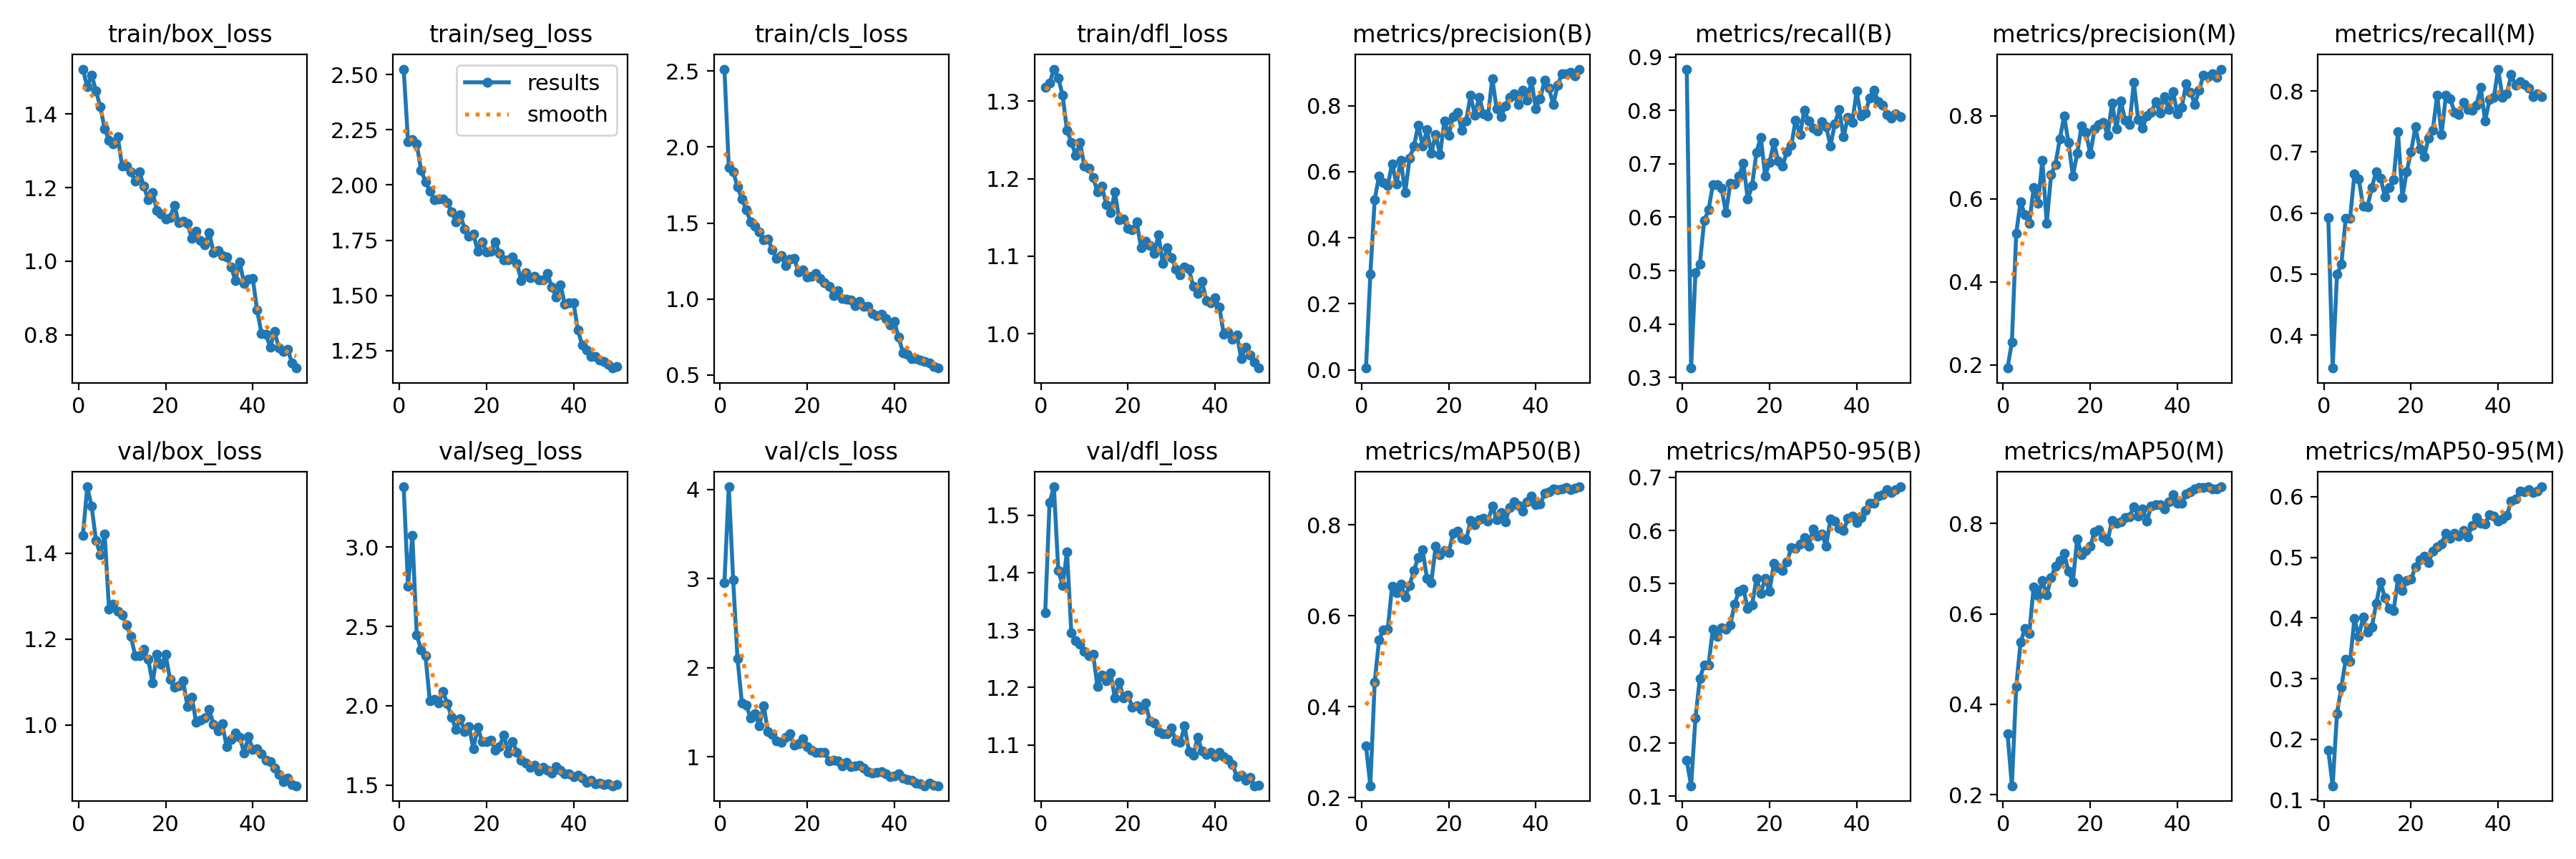

In [13]:
import os
from IPython.display import Image, display

# Unzip runs.zip if /content/runs/ doesn't already exist
if not os.path.exists('/content/runs/segment/train'):
    !unzip /content/drive/MyDrive/BreastCancerProject/Datasets/runs.zip -d /content/

# Path to the results.png
results_path = '/content/runs/segment/train/results.png'

# Check if the results.png exists and display it
if os.path.exists(results_path):
    display(Image(filename=results_path))
else:
    print("❌ results.png not found at expected location:", results_path)


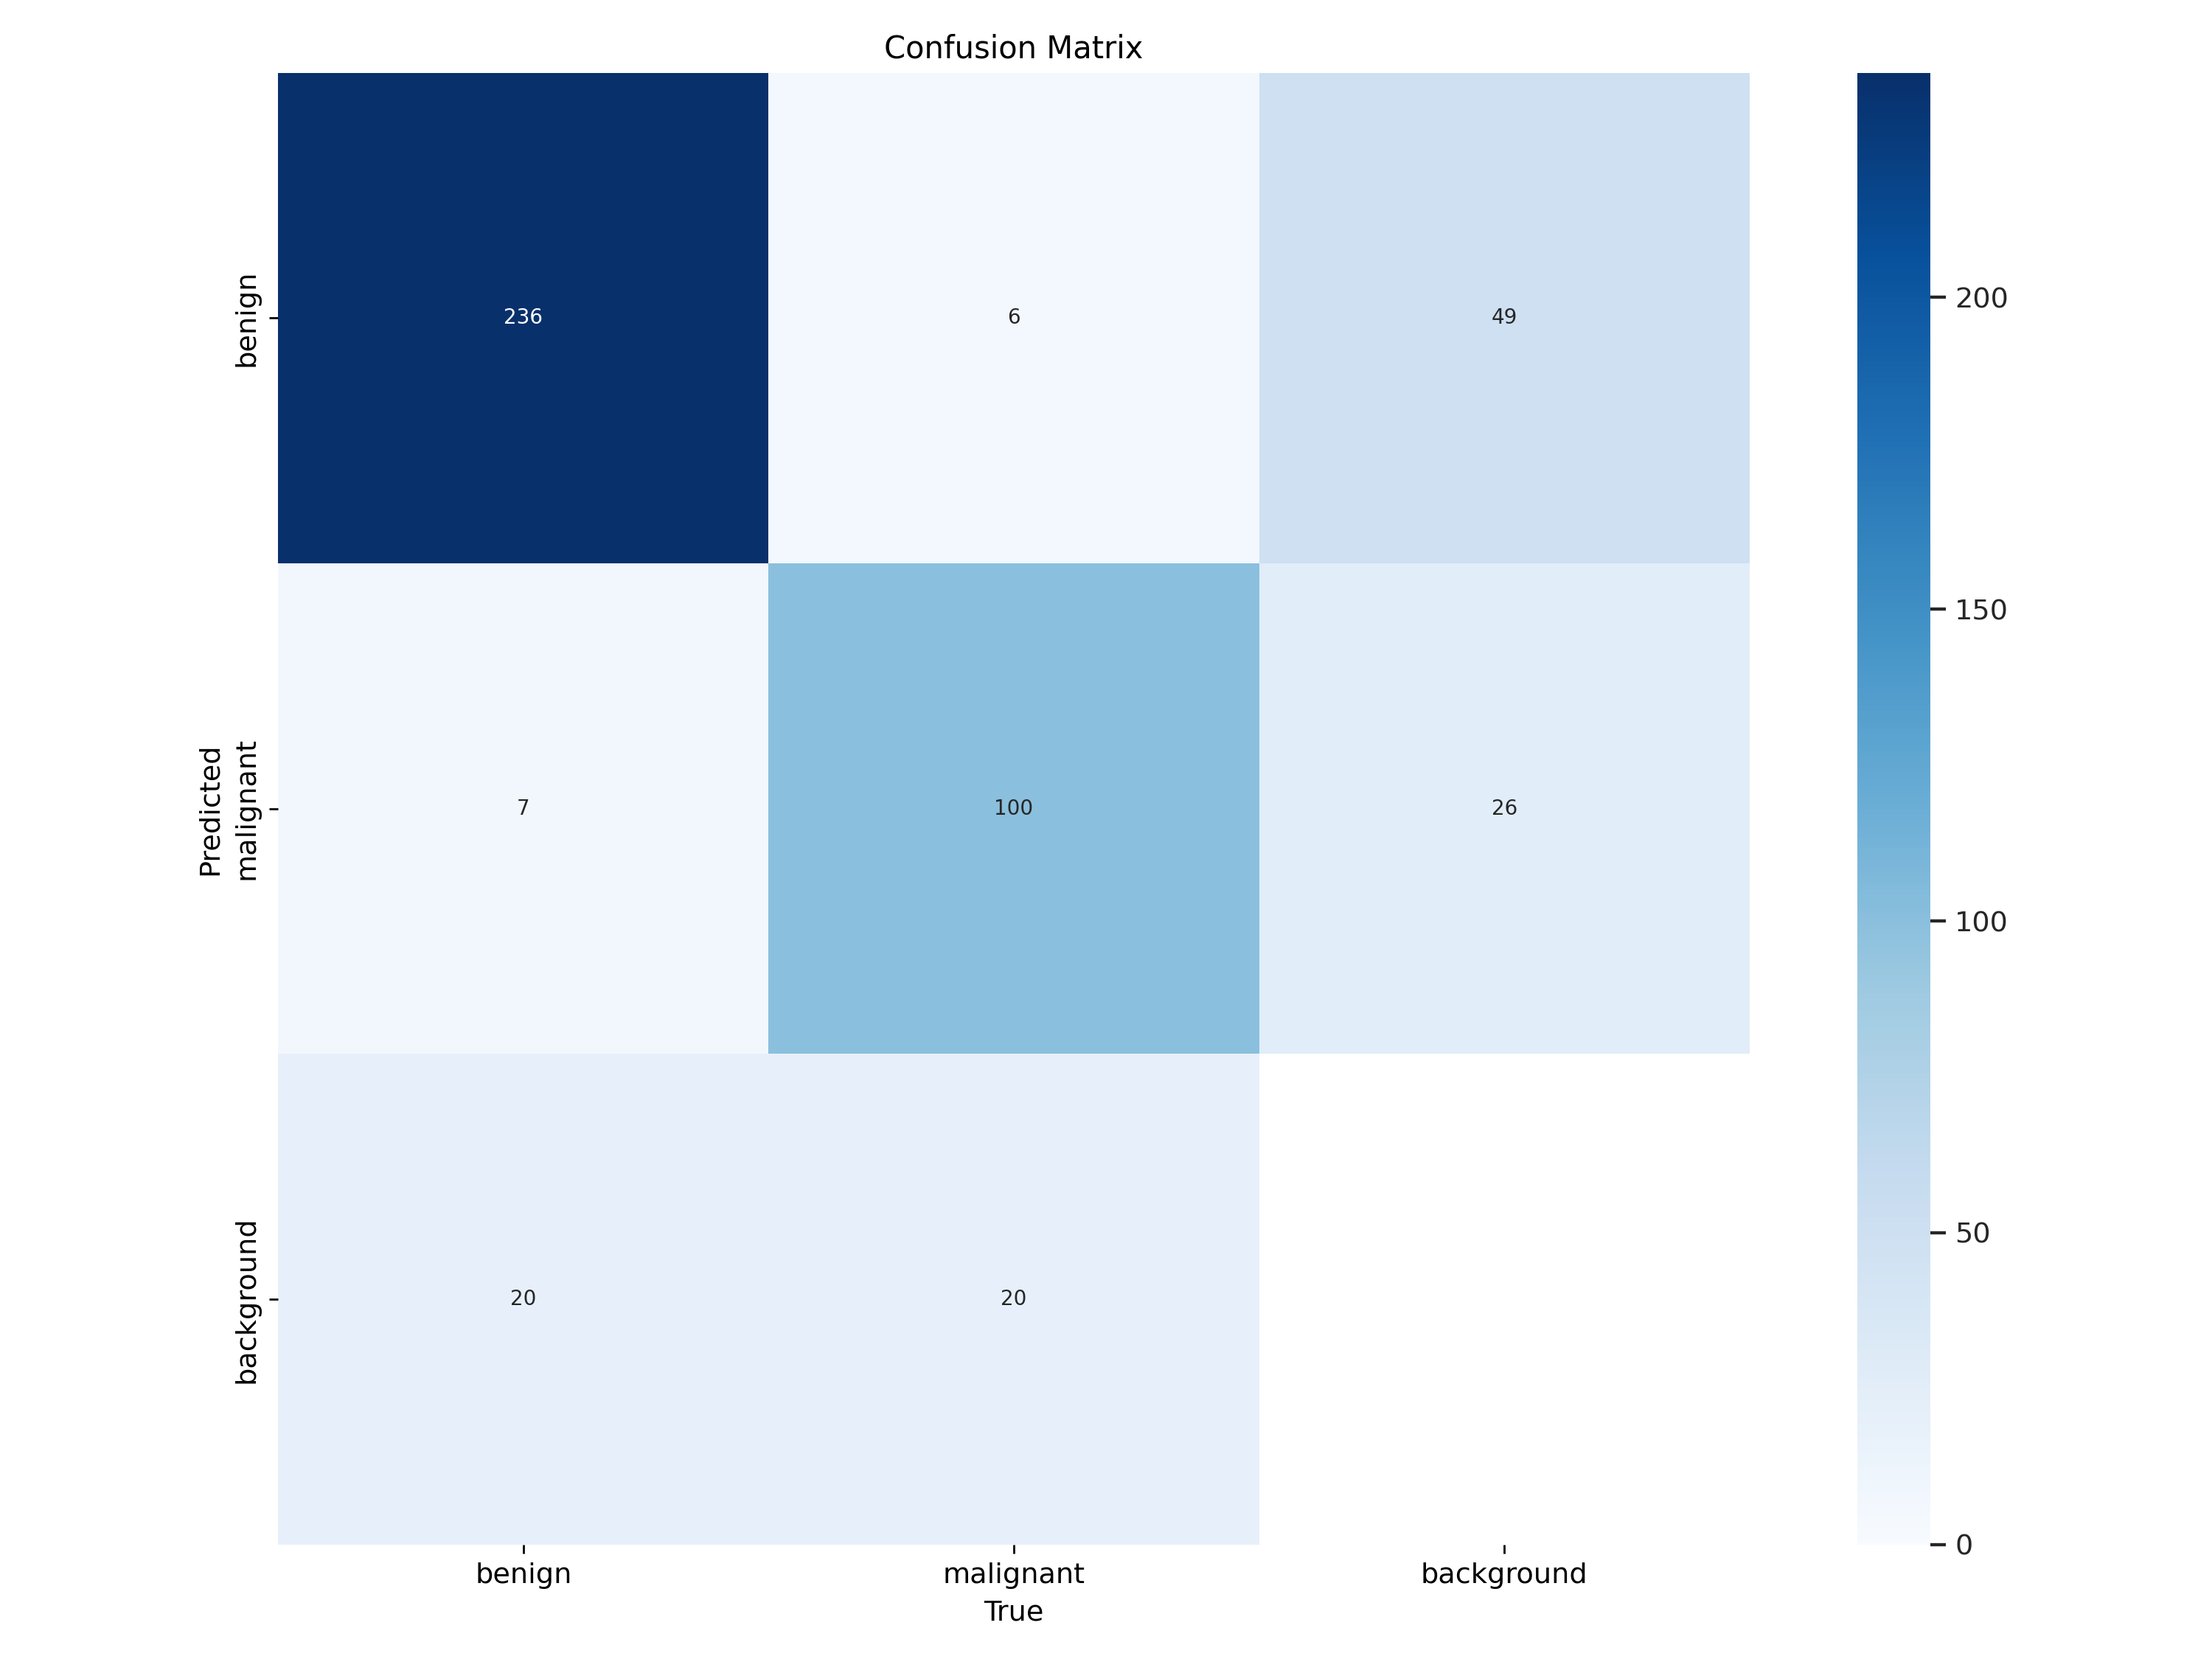

In [14]:
import os
from IPython.display import Image, display

# Path to the confusion_matrix.png
conf_matrix_path = '/content/runs/segment/train/confusion_matrix.png'

# Check if the confusion_matrix.png exists and display it
if os.path.exists(conf_matrix_path):
    display(Image(filename=conf_matrix_path))
else:
    print("❌ confusion_matrix.png not found at expected location:", conf_matrix_path)


--- Segmentation Metrics (Pixel-wise) ---
Precision: 0.9105
Recall:    0.7883
F1 Score:  0.8450
IoU Score: 0.7316


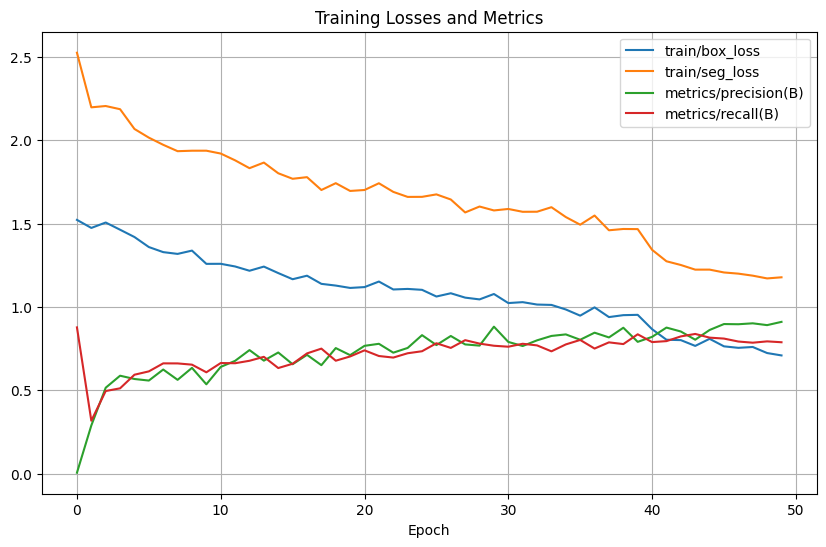

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your results CSV
results_path = '/content/runs/segment/train/results.csv'

# Load the results
results = pd.read_csv(results_path)

# --- Show final metrics ---
final_row = results.iloc[-1]
precision = final_row['metrics/precision(B)']
recall = final_row['metrics/recall(B)']

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate IoU Score
iou_score = (precision * recall) / (precision + recall - (precision * recall))

print('--- Segmentation Metrics (Pixel-wise) ---')
print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1 Score:  {f1_score:.4f}')
print(f'IoU Score: {iou_score:.4f}')

# --- Optional: plot curves ---
results[['train/box_loss', 'train/seg_loss', 'metrics/precision(B)', 'metrics/recall(B)']].plot(figsize=(10,6))
plt.title('Training Losses and Metrics')
plt.xlabel('Epoch')
plt.grid()
plt.show()


In [16]:
from ultralytics import YOLO
import torch
import numpy as np
import glob
import os
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, jaccard_score

# 1. Load model
model = YOLO('/content/runs/segment/train/weights/best.pt')

# 2. Path to validation images
val_images_dir = '/content/drive/MyDrive/BreastCancerProject/Datasets/val/images'  # <-- adjust if needed
image_paths = glob.glob(os.path.join(val_images_dir, '*.png')) + glob.glob(os.path.join(val_images_dir, '*.jpg'))

# 3. Initialize lists
y_true = []
y_pred = []

# 4. Predict on each image
for img_path in image_paths:
    pred = model.predict(img_path, conf=0.25, iou=0.5, verbose=False)[0]

    if pred.masks is None:
        continue  # Skip if no masks predicted

    # Get predicted classes
    pred_classes = pred.boxes.cls.cpu().numpy()

    # Load true class manually from filename (assuming filenames contain class info, e.g., benign_123.png)
    filename = os.path.basename(img_path).lower()
    if 'benign' in filename:
        true_class = 0
    elif 'malignant' in filename:
        true_class = 1
    elif 'normal' in filename:
        true_class = 2
    else:
        continue  # skip if filename is weird

    # Match each predicted object to the true class
    for _ in range(len(pred_classes)):
        y_true.append(true_class)
        y_pred.append(int(pred_classes[0]))  # take first prediction (simplification)

# 5. Convert to numpy arrays
y_true = np.array(y_true).astype(int)
y_pred = np.array(y_pred).astype(int)

# 6. Class names
target_names = ['Benign', 'Malignant', 'Normal']

# 7. Print Overall Pixel-Wise Metrics
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
iou = jaccard_score(y_true, y_pred, average='macro')

print('--- Segmentation Metrics (Pixel-wise) ---')
print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1 Score:  {f1:.4f}')
print(f'IoU Score: {iou:.4f}')
print()

# 8. Print Class-wise Report
print('--- Class-wise Report ---')
print(classification_report(y_true, y_pred, target_names=target_names))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 9. Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])

fig, ax = plt.subplots(figsize=(8, 6))  # Bigger figure size
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues', values_format='d', ax=ax)

# Make text larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for text in disp.text_.ravel():
    text.set_fontsize(12)

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)

# Save confusion matrix
output_path = '/content/final_confusion_matrix.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

print(f"✅ Confusion matrix saved at: {output_path}")

plt.show()



--- Segmentation Metrics (Pixel-wise) ---
Precision: 0.6187
Recall:    0.6244
F1 Score:  0.6215
IoU Score: 0.5825

--- Class-wise Report ---
              precision    recall  f1-score   support

      Benign       0.95      0.96      0.95       280
   Malignant       0.91      0.92      0.91       131
      Normal       0.00      0.00      0.00         4

    accuracy                           0.93       415
   macro avg       0.62      0.62      0.62       415
weighted avg       0.93      0.93      0.93       415



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m